In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib tk

In [2]:
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np
import math
import Optimization_Convergence_Plotter
import Optimization_Shape_Plotter
import Optimization_Gradient_Plotter

## Setup

In [3]:
# Absolute path to the directory with all the optimization results
CONST_OPTIMIZATION_DIR_ABS_PATH = "/Users/jm-034232/Documents/McGill/Research/DPGSolver/build_2D/output/optimization/euler/steady/NURBS_Airfoil"


In [4]:
CONST_figure_output_directory = "/Users/jm-034232/Documents/McGill/Research/Results/NURBS_Enhanced_Unstructured_Optimization"

In [5]:
# The files to read. The first file holds the convergence data, the second holds the shape profile
# and the third holds the gradient.

CONST_File_list = [
    
    # Case P = 2, ML = 1:
    
#     # NURBS Metrics
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 2, ml = 1, NURBS Metrics", "r", "-", ".", False),
    
#     # Isoparametric
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 2, ml = 1, Standard (Isoparameteric)", "c", "-", ".", False),
 
#     # Superparametric
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml1_P2_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 2, ml = 1, Standard (Superparameteric)", "m", "-", ".", False),
    
    
    
    
    # Case P = 1, ML = 2:
    
    # NURBS Metrics
    ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
     "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
     "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
     "P = 1, ml = 2, NURBS Metrics", "r", "-", ".", True),
    
#     # Isoparametric
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 1, ml = 2, Standard (Isoparameteric)", "c", "-", ".", False),
 
#     # Superparametric
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P1_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 1, ml = 2, Standard (Superparameteric)", "m", "-", ".", False),
    
    # Case P = 2, ML = 2:
    
    # NURBS Metrics
    ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
     "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
     "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
     "P = 2, ml = 2, NURBS Metrics", "g", "-", ".", True),
    
#     # Isoparametric
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 2, ml = 2, Standard (Isoparameteric)", "c", "-", ".", False),
 
#     # Superparametric
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P2_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 2, ml = 2, Standard (Superparameteric)", "m", "-", ".", False),
    
    
    # Case P = 3, ML = 2:
    
    # NURBS Metrics
    ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
     "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
     "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_Y_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
     "P = 3, ml = 2, NURBS Metrics", "b", "-", ".", True),
    
#     # Isoparametric
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_NIso_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 3, ml = 2, Standard (Isoparameteric)", "c", "-", ".", False),
 
#     # Superparametric
#     ("Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Optimization_Convergence.txt", 
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Optimized_NURBS_Patch.txt",
#      "Constrained_Target_CL_cases/NACA0012_Target_CL_0.25_Unstructured/ml2_P3_NURBS_NSuper_CM_eq_0.1255_vfc_eq_1.0_Objective_Gradient.txt", 
#      "P = 3, ml = 2, Standard (Superparameteric)", "m", "-", ".", False),
    
]

## Convergence Plots
The following consists of plots of the convergence of the cost function and its gradient's L2 norm as 
a function of design iterations and CPU time. Additional plots that are optionally included are the 
convergence of the lift coefficient and pitching moment.

In [6]:
file_convergence_data = []

for data_tuple in CONST_File_list:
    convergence_file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[0])
    conv_data = Optimization_Convergence_Plotter.read_convergence_file(convergence_file_abs_path)

    file_convergence_data.append(conv_data)

### Cost Function vs. Design Iterations and CPU Time

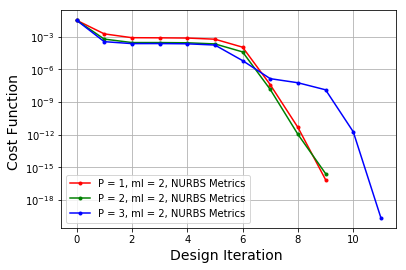

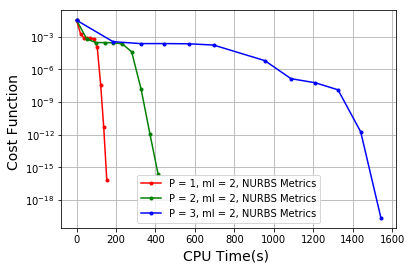

In [7]:

# log(Objective) Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "Cost_Function", True)
plt.savefig(os.path.join(CONST_figure_output_directory, "cost_vs_iteration_Pall.pdf"))

# log(Objective) Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "Cost_Function", True)


### Gradient of Cost Function L2 Norm vs Design Iterations and CPU Time

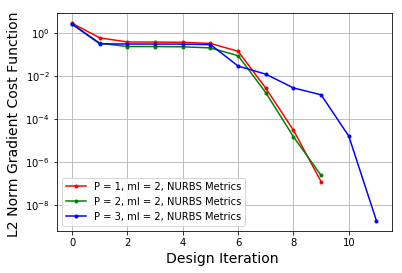

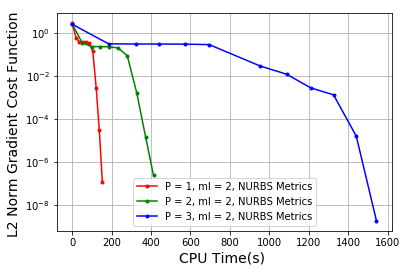

In [8]:
# log(Gradient) Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "L2_Norm_Gradient_Cost_Function", True)
plt.savefig(os.path.join(CONST_figure_output_directory, "grad_vs_iteration_Pall.pdf"))

# log(Gradient) Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "L2_Norm_Gradient_Cost_Function", True)



### Lift Coefficient vs. Design Iterations and CPU Time

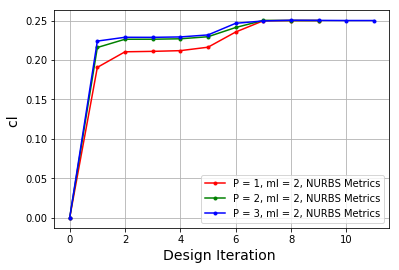

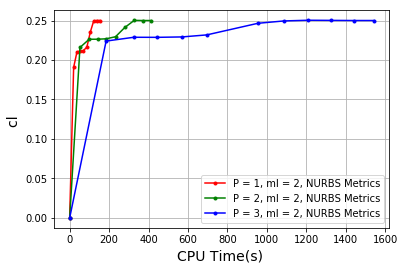

In [9]:
# CL vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", "cl")
plt.savefig(os.path.join(CONST_figure_output_directory, "cl_vs_iteration_Pall.pdf"))

# CL vs CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", "cl")



### Pitching Moment vs. Design Iterations and CPU Time

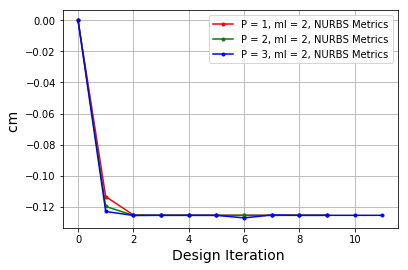

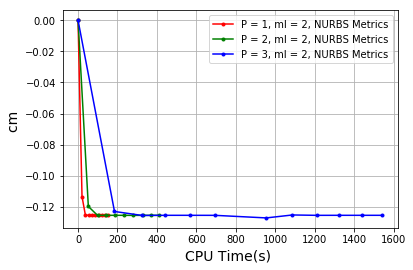

In [10]:
# CM vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", "cm")
plt.savefig(os.path.join(CONST_figure_output_directory, "cm_vs_iteration_Pall.pdf"))

# CM vs CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", "cm")


## Shape Plots
Plots of the initial and optimized shapes from the optimization.

### Setup

In [11]:

# Additional files to plot shapes for (for instance, this may store the reference shapes 
# for the optimization). Note that some file names will be None in order to mimic the file format
# from CONST_File_list

CONST_Additional_File_list = [
    (None, "geometry_parameters_NACA0012_tests_reference.geo", None, "Initial Profile", "k", "--", ".", False), # Initial Profile
]


In [22]:
# Plot Range (to use for the Airfoil case)
CONST_PLOT_X_RANGE = [-0.65, 0.65]
CONST_PLOT_Y_RANGE = [-0.3, 0.3]


In [23]:
# The points (on the knot domain) to plot
CONST_Airfoil_NURBS_Domain_pts = []
t_vals = np.linspace(-1., 1., 100)
for t in t_vals:
    CONST_Airfoil_NURBS_Domain_pts.append((t, -1.))
    

In [24]:
# Load the file patch data (which describes the geometry)
file_patch_data = []

for data_tuple in CONST_File_list:

    file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[1])
    patch_info = Optimization_Shape_Plotter.read_Patch_file(file_abs_path)

    file_patch_data.append(patch_info)
    

In [25]:
# Load the additional file patch data
file_additional_patch_data = []

for data_tuple in CONST_Additional_File_list:

    file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[1])
    patch_info = Optimization_Shape_Plotter.read_Patch_file(file_abs_path)

    file_additional_patch_data.append(patch_info)
    

### Geometry Plots

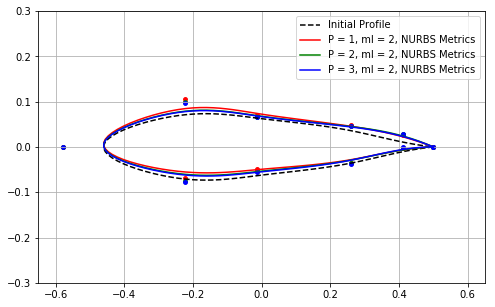

In [26]:

# Plot the geometry
plt.figure(figsize=(8, 5))

# Plot some additional reference profiles
for case_index in range(len(CONST_Additional_File_list)):
    
    # Get the patch information
    patch_data = file_additional_patch_data[case_index]
    case_data_tuple = CONST_Additional_File_list[case_index]
    Optimization_Shape_Plotter.plot_patch_points(patch_data, case_data_tuple, CONST_Airfoil_NURBS_Domain_pts)

    
# Plot the optimized geometries
for case_index in range(len(CONST_File_list)):
    
    # Get the patch information
    patch_data = file_patch_data[case_index]
    case_data_tuple = CONST_File_list[case_index]
    Optimization_Shape_Plotter.plot_patch_points(patch_data, case_data_tuple, CONST_Airfoil_NURBS_Domain_pts)

    
plt.legend()
plt.grid()

plt.gca().set_xlim(CONST_PLOT_X_RANGE)
plt.gca().set_ylim(CONST_PLOT_Y_RANGE)

plt.savefig(os.path.join(CONST_figure_output_directory, "optimized_shapes_Pall_y_scaling.pdf"))

## Gradient Plots

Plots of the gradient of the optimization at the first design step

In [299]:
file_gradient_data = []

for data_tuple in CONST_File_list:

    file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[2])
    case_gradient_data = Optimization_Gradient_Plotter.read_gradient_file(file_abs_path)

    file_gradient_data.append(case_gradient_data)


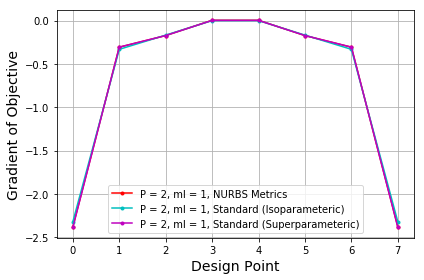

In [300]:
plt.figure(1)
Optimization_Gradient_Plotter.plot_gradient_data(CONST_File_list, file_gradient_data)
plt.tight_layout()
plt.savefig(os.path.join(CONST_figure_output_directory, "gradient_first_iter_P2_ml1.pdf"))